## Import Packages

In [1]:
# Import all packages for Metpy

from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Notice that we will use "plt" to access matplotlib
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
import metpy.plots as mpplots

import numpy as np

from io import StringIO
from metpy.io import parse_metar_file
from metpy.units import pandas_dataframe_to_unit_arrays
from matplotlib.patheffects import withStroke
from metpy.cbook import get_test_data

# Here is where we import the TDSCatalog class from siphon for obtaining our data 
from siphon.catalog import TDSCatalog

In [2]:
# Import all Pandas packages for Analyzing data frames
import pandas as pd
from matplotlib import pyplot as plt
from numpy.fft import fft, ifft
from scipy.stats import norm
import scipy
from matplotlib.ticker import PercentFormatter
import seaborn

# Import and Format Raw Data

## Pollution Data

In [3]:
# Combine all Pollution data into one csv file
Air_pollution_csv = ['https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/Brownsville.csv',
                     'https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/Corpus_Christi_Tulos.csv',
                     'https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/Corpus_Christi_West_pt_1.csv',
                     'https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/Corpus_Christi_West_pt_2.csv',
                     'https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/Laredo_pt_1.csv',
                     'https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/Laredo_pt_2.csv',
                     'https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/McAllen_pt_1.csv',
                     'https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Tx%20Air%20Pollution/McAllen_pt_2.csv']

In [4]:
# Create Pandas Dataframe of data
Tx_Air_Pollution =  pd.concat([pd.read_csv(f,parse_dates = ["utc"]) for f in Air_pollution_csv]).rename(columns={"utc":"date time"})

In [5]:
# Display Pollution Data
Tx_Air_Pollution.head()

,locationId,location,city,country,date time,local,parameter,value,unit,latitude,longitude
0,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-05 16:00:00+00:00,2018-01-05T10:00:00-06:00,o3,0.042,ppm,25.8925,-97.4936
1,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-05 01:00:00+00:00,2018-01-04T19:00:00-06:00,o3,0.028,ppm,25.8925,-97.4936
2,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-05 00:00:00+00:00,2018-01-04T18:00:00-06:00,o3,0.036,ppm,25.8925,-97.4936
3,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-04 18:00:00+00:00,2018-01-04T12:00:00-06:00,o3,0.040,ppm,25.8925,-97.4936
4,833,Brownsville C80,Brownsville-Harlingen,US,2018-01-04 13:00:00+00:00,2018-01-04T07:00:00-06:00,o3,0.004,ppm,25.8925,-97.4936


In [6]:
# Information of the dataframe
Tx_Air_Pollution.info

<bound method DataFrame.info of       locationId         location                      city country  \
0            833  Brownsville C80     Brownsville-Harlingen      US   
1            833  Brownsville C80     Brownsville-Harlingen      US   
2            833  Brownsville C80     Brownsville-Harlingen      US   
3            833  Brownsville C80     Brownsville-Harlingen      US   
4            833  Brownsville C80     Brownsville-Harlingen      US   
...          ...              ...                       ...     ...   
2031        1813      Mission C43  McAllen-Edinburg-Mission      US   
2032        1813      Mission C43  McAllen-Edinburg-Mission      US   
2033        1813      Mission C43  McAllen-Edinburg-Mission      US   
2034        1813      Mission C43  McAllen-Edinburg-Mission      US   
2035        1813      Mission C43  McAllen-Edinburg-Mission      US   

                     date time                      local parameter  value  \
0    2018-01-05 16:00:00+00:00  2018-

In [7]:
# Output pandas dataframe
#Tx_Air_Pollution.to_csv("Tx_Air_Pollution.csv")

In [8]:
# Obtain unique values of locations in DF

Tx_Air_Pollution['location'].unique()

array(['Brownsville C80', 'Corpus Christi Tulos', 'Corpus Christi West',
       'Laredo C44', 'Mission C43'], dtype=object)

In [9]:
# Seperate Data

Brownsville = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Brownsville C80', ['date time','parameter','value','unit']]
Corpus_Christi_Tulos = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Corpus Christi Tulos', ['date time','parameter','value','unit']]
Corpus_Christi_West = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Corpus Christi West', ['date time','parameter','value','unit']]
Laredo = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Laredo C44', ['date time','parameter','value','unit']]
Mission = Tx_Air_Pollution.loc[Tx_Air_Pollution['location']=='Mission C43', ['date time','parameter','value','unit']]

# Combine Corpus Christi Locations
Corpus_Christi = pd.concat([Corpus_Christi_Tulos, Corpus_Christi_West])

#
Brownsville.head()

,date time,parameter,value,unit
0,2018-01-05 16:00:00+00:00,o3,0.042,ppm
1,2018-01-05 01:00:00+00:00,o3,0.028,ppm
2,2018-01-05 00:00:00+00:00,o3,0.036,ppm
3,2018-01-04 18:00:00+00:00,o3,0.040,ppm
4,2018-01-04 13:00:00+00:00,o3,0.004,ppm


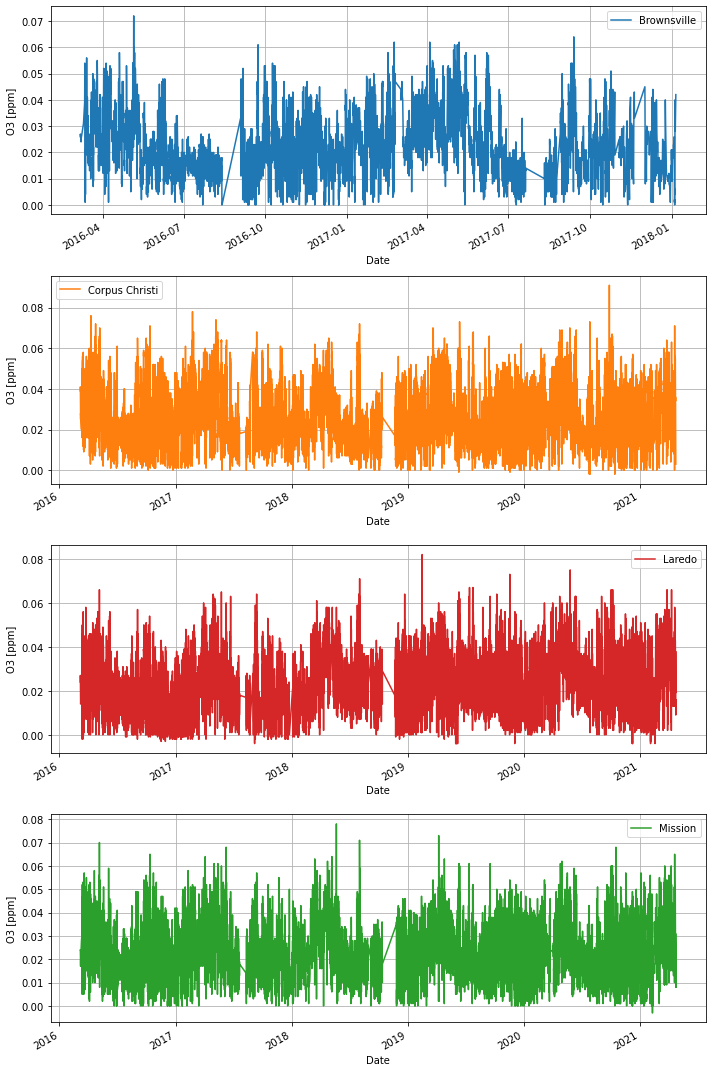

In [10]:
# Visualize data using plots

figure, axes = plt.subplots(nrows = 4,ncols=1)
Brownsville.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Brownsville" , ax = axes[0])

Corpus_Christi.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Corpus Christi", ax = axes[1], color = 'tab:orange' )

Laredo.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Laredo", ax = axes[2], color = 'tab:red' )

Mission.plot(x="date time",y = "value" , xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                 figsize = (10,15), label = "Mission", ax = axes[3], color = 'tab:green' )

figure.tight_layout()

#plt.savefig("Subplot O3 locations.png")

In [11]:
# Group data by Year and month means
# This will clean up data

Brownsville_sep = Brownsville.groupby([(Brownsville['date time'].dt.year), 
                                       (Brownsville['date time'].dt.month),(Brownsville['date time'].dt.isocalendar().week)
                                      ]).agg({'value' : ['mean']}).rename_axis(["Year","Month", "Week"])

Corpus_Christi_sep = Corpus_Christi.groupby([(Corpus_Christi['date time'].dt.year), 
                                       (Corpus_Christi['date time'].dt.month),(Corpus_Christi['date time'].dt.isocalendar().week)
                                            ]).agg({'value' : ['mean']}).rename_axis(["Year","Month", "Week"])

Laredo_sep = Laredo.groupby([(Laredo['date time'].dt.year), 
                                       (Laredo['date time'].dt.month),(Laredo['date time'].dt.isocalendar().week)
                            ]).agg({'value' : ['mean']}).rename_axis(["Year","Month", "Week"])

Mission_sep = Mission.groupby([(Mission['date time'].dt.year), 
                                       (Mission['date time'].dt.month),(Mission['date time'].dt.isocalendar().week)
                              ]).agg({'value' : ['mean']}).rename_axis(["Year","Month", "Week"])
# See New Data look
Brownsville_sep


value
                     mean
Year Month Week          
2016 3     9     0.026500
           10    0.031273
           11    0.026969
           12    0.033688
           13    0.024574
...                   ...
2017 12    49    0.022367
           50    0.018483
           51    0.014625
           52    0.011905
2018 1     1     0.016744

[107 rows x 1 columns]

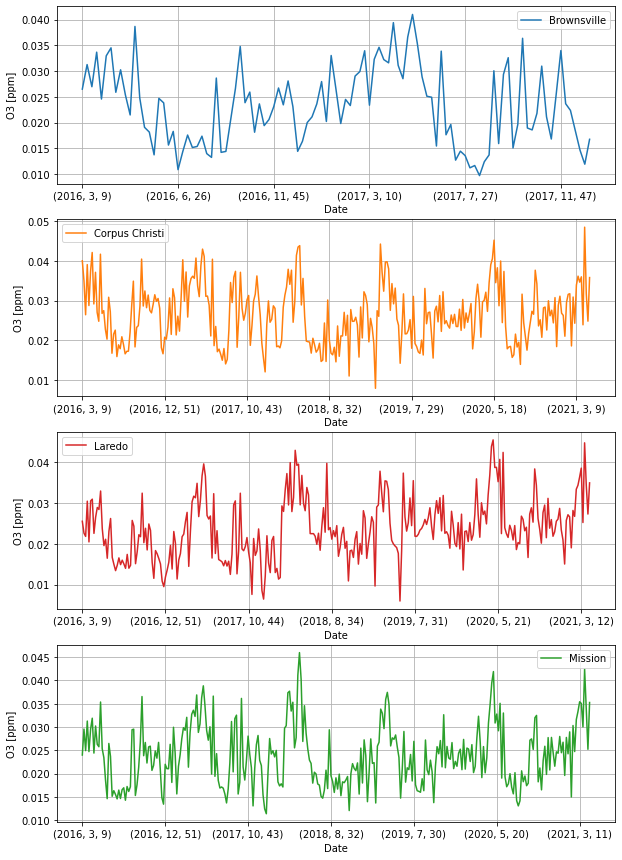

In [12]:
# New Visualized Data 
figure, axes = plt.subplots(nrows = 4,ncols=1)
Brownsville_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15), ax = axes[0]).legend(["Brownsville"])
#plt.savefig("Brownsville Avg O3.png")

Corpus_Christi_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15), ax = axes[1], color = 'tab:orange').legend(["Corpus Christi"])
#plt.savefig("Corpus Christi Avg O3.png")

Laredo_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15),  ax = axes[2], color = 'tab:red').legend(["Laredo"])
#plt.savefig("Laredo Avg O3.png")

Mission_sep.plot(xlabel = 'Date', ylabel='O3 [ppm]', grid = True ,
                     figsize = (10,15), ax = axes[3], color = 'tab:green').legend(["Mission"])
#plt.savefig("Mission Avg O3.png")


In [13]:
# Apply above plots to the complete Tx Pollution data set
# This data set is the combination of the four locations above

Tx_Air_sep = Tx_Air_Pollution.groupby([(Tx_Air_Pollution['date time'].dt.year), 
                                       (Tx_Air_Pollution['date time'].dt.month),(Tx_Air_Pollution['date time'].dt.isocalendar().week)
                                       ]).agg({'value' : ['mean']}).rename_axis(["Year","Month", "Week"])

# Visualize New Data Frame
Tx_Air_sep

value
                     mean
Year Month Week          
2016 3     9     0.031200
           10    0.030716
           11    0.025363
           12    0.034700
           13    0.025466
...                   ...
2021 3     13    0.025804
     4     13    0.045990
           14    0.032839
           15    0.025545
           16    0.035446

[309 rows x 1 columns]

Text(0.5, 1.0, 'Combined Pollution Data (Avg.)')

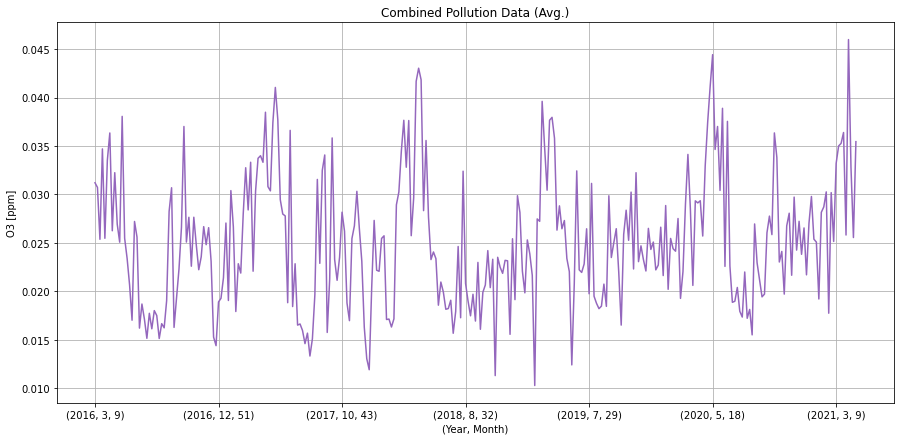

In [14]:
# Plot the Formatted Data

Tx_Air_sep.plot(xlabel = '(Year, Month)', ylabel='O3 [ppm]', grid = True ,
                     figsize = (15,7), color = 'tab:purple' , legend = False)
plt.title("Combined Pollution Data (Avg.)")

#plt.savefig("Overall Avg O3.png")

In [15]:
Tx_Air_sep_year = Tx_Air_Pollution.groupby([(Tx_Air_Pollution['date time'].dt.year)
                                           ]).agg({'value' : ['mean']}).rename_axis(["Year"])

<Figure size 432x288 with 0 Axes>

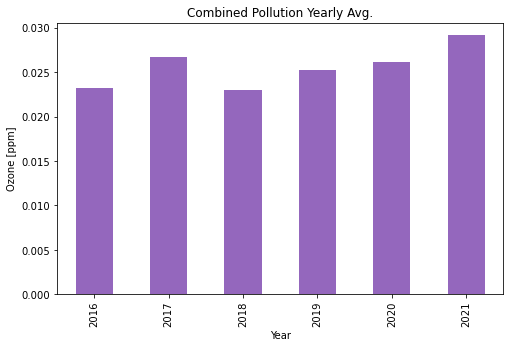

In [16]:
# Display yearly average of ozone pollution in south texas

plt.figure()
Tx_Air_sep_year.plot(kind = 'bar',legend = False, color = 'tab:purple' , figsize = (8,5))
plt.ylabel("Ozone [ppm]")
plt.title("Combined Pollution Yearly Avg.")
plt.show()

#plt.savefig("Yearly O3 Avg Bar.png")

## Solar Irradiance Data

In [17]:
# Convert .txt to csv format for pandas
Range1 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Solar%20Irradiance%20Data/2015_to_2016.txt" )
Range2 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Solar%20Irradiance%20Data/2017_to_2018.txt")
Range3 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Solar%20Irradiance%20Data/2019_to_2020.txt")
Range4 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Solar%20Irradiance%20Data/2021_to_current.txt")

# Combine all data into one pandas dataframe
Solar_irradiance = pd.concat([Range1, Range2, Range3, Range4])


In [18]:
# Make sure data looks good
Solar_irradiance.head()

,DATE (MM/DD/YYYY),HOUR-CST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Air Temperature [deg C],Avg Relative Humidity [%],Avg Avg Wind Speed @ 10m [m/s]
0,1/1/2015,1,-1.5128,0.0015,-1.7217,-99999.0,-99999.0,-99999.0
1,1/1/2015,2,-1.5068,0.0000,-1.4733,-99999.0,-99999.0,-99999.0
2,1/1/2015,3,-1.5280,0.0015,-1.4306,-99999.0,-99999.0,-99999.0
3,1/1/2015,4,-1.4508,0.0005,-1.4303,-99999.0,-99999.0,-99999.0
4,1/1/2015,5,-1.4732,0.0109,-1.4303,-99999.0,-99999.0,-99999.0


In [19]:
Solar_irradiance.info

<bound method DataFrame.info of      DATE (MM/DD/YYYY)  HOUR-CST  Avg Global Horizontal [W/m^2]  \
0             1/1/2015         1                        -1.5128   
1             1/1/2015         2                        -1.5068   
2             1/1/2015         3                        -1.5280   
3             1/1/2015         4                        -1.4508   
4             1/1/2015         5                        -1.4732   
...                ...       ...                            ...   
1592         4/13/2021        19                        34.5401   
1593         4/13/2021        20                        -1.5162   
1594         4/13/2021        21                        -1.6875   
1595         4/13/2021        22                        -1.6877   
1596         4/13/2021        23                        -1.6881   

      Avg Direct Normal [W/m^2]  Avg Diffuse Horizontal [W/m^2]  \
0                        0.0015                         -1.7217   
1                        0.00

In [20]:
# Output data for use in other code
#Solar_irradiance.to_csv("Solar_irradiance.csv")

In [21]:
# List the Header Names for analysis

Solar_irradiance.columns.values

array(['DATE (MM/DD/YYYY)', 'HOUR-CST', 'Avg Global Horizontal [W/m^2]',
       'Avg Direct Normal [W/m^2]', 'Avg Diffuse Horizontal [W/m^2]',
       'Avg Air Temperature [deg C]', 'Avg Relative Humidity [%]',
       'Avg Avg Wind Speed @ 10m [m/s]'], dtype=object)

In [22]:
# Format Date into Date time format 

Solar_irradiance['DATE (MM/DD/YYYY)'] = pd.to_datetime(Solar_irradiance['DATE (MM/DD/YYYY)'] , format='%m/%d/%Y')
Solar_irradiance

,DATE (MM/DD/YYYY),HOUR-CST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Air Temperature [deg C],Avg Relative Humidity [%],Avg Avg Wind Speed @ 10m [m/s]
0,2015-01-01,1,-1.5128,0.0015,-1.7217,-99999.0000,-99999.0000,-99999.0000
1,2015-01-01,2,-1.5068,0.0000,-1.4733,-99999.0000,-99999.0000,-99999.0000
2,2015-01-01,3,-1.5280,0.0015,-1.4306,-99999.0000,-99999.0000,-99999.0000
3,2015-01-01,4,-1.4508,0.0005,-1.4303,-99999.0000,-99999.0000,-99999.0000
4,2015-01-01,5,-1.4732,0.0109,-1.4303,-99999.0000,-99999.0000,-99999.0000
...,...,...,...,...,...,...,...,...
1592,2021-04-13,19,34.5401,0.2749,34.8981,28.2473,72.3773,2.9837
1593,2021-04-13,20,-1.5162,-0.3816,-2.2068,27.3743,75.1110,2.3850
1594,2021-04-13,21,-1.6875,-0.3817,-2.4226,26.5663,76.9167,2.6495
1595,2021-04-13,22,-1.6877,-0.3817,-2.2229,25.5898,79.9210,1.7510


In [23]:
# Filter Data out

filter1 = Solar_irradiance.iloc[:,2:8]> 0
Solar_irradiance.where(filter1, inplace = True)

# Output filtered data
Solar_irradiance

,DATE (MM/DD/YYYY),HOUR-CST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Air Temperature [deg C],Avg Relative Humidity [%],Avg Avg Wind Speed @ 10m [m/s]
0,2015-01-01,1,NaN,0.0015,NaN,NaN,NaN,NaN
1,2015-01-01,2,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,3,NaN,0.0015,NaN,NaN,NaN,NaN
3,2015-01-01,4,NaN,0.0005,NaN,NaN,NaN,NaN
4,2015-01-01,5,NaN,0.0109,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1592,2021-04-13,19,34.5401,0.2749,34.8981,28.2473,72.3773,2.9837
1593,2021-04-13,20,NaN,NaN,NaN,27.3743,75.1110,2.3850
1594,2021-04-13,21,NaN,NaN,NaN,26.5663,76.9167,2.6495
1595,2021-04-13,22,NaN,NaN,NaN,25.5898,79.9210,1.7510


<AxesSubplot:xlabel='DATE (MM/DD/YYYY)', ylabel='Avg. Diffuse Horizontal [W/m^2]'>

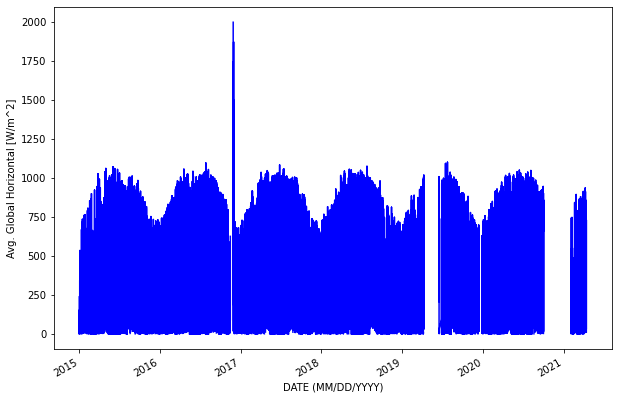

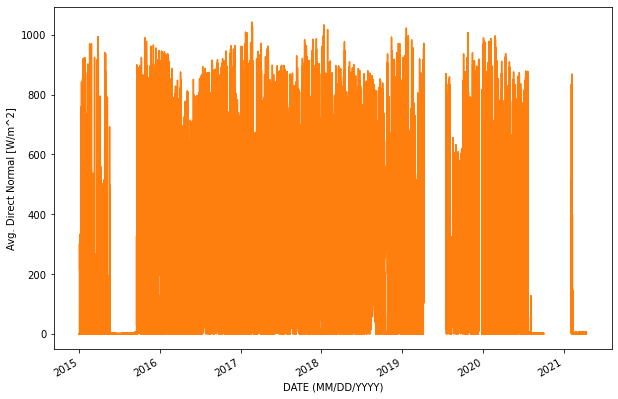

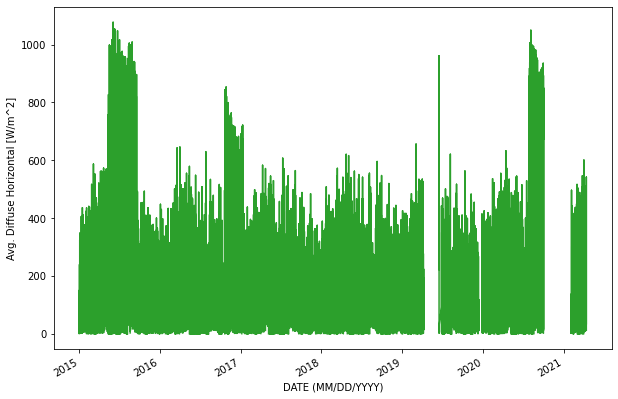

In [24]:
# Visualize Data

Solar_irradiance.plot(x="DATE (MM/DD/YYYY)" , y = "Avg Global Horizontal [W/m^2]" ,  ylabel = 'Avg. Global Horizontal [W/m^2]',
                      figsize = (10,7), legend = False , color = 'b')
#plt.savefig("Global Horizontal.png")

Solar_irradiance.plot(x="DATE (MM/DD/YYYY)" , y = "Avg Direct Normal [W/m^2]" ,   ylabel = 'Avg. Direct Normal [W/m^2]',
                      figsize = (10,7), legend = False , color = 'tab:orange')
#plt.savefig("Direct Normal.png")

Solar_irradiance.plot(x="DATE (MM/DD/YYYY)" , y = "Avg Diffuse Horizontal [W/m^2]" ,   ylabel = 'Avg. Diffuse Horizontal [W/m^2]',
                      figsize = (10,7), legend = False , color = 'tab:green')
#plt.savefig("Diffused Horizontal.png")


In [25]:
# Clean up data by grouping by Monthly average per year

Avg_Global_Hor = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year), 
                                                 (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month),
                                           (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.isocalendar().week)
                                                ]).agg({'Avg Global Horizontal [W/m^2]' : ['mean']}).rename_axis(["Year","Month", "Week"])

Avg_Direct_Nor = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year), 
                                                 (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month),
                                           (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.isocalendar().week)
                                                ]).agg({'Avg Direct Normal [W/m^2]' : ['mean']}).rename_axis(["Year","Month", "Week"])

Avg_Diffuse_Hor = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year), 
                                                 (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month),
                                            (Solar_irradiance['DATE (MM/DD/YYYY)'].dt.isocalendar().week)
                                                ]).agg({'Avg Diffuse Horizontal [W/m^2]' : ['mean']}).rename_axis(["Year","Month", "Week"])



<AxesSubplot:xlabel='Year,Month,Week', ylabel='Avg. Diffused Horrizontal [W/m^2]'>

<Figure size 432x288 with 0 Axes>

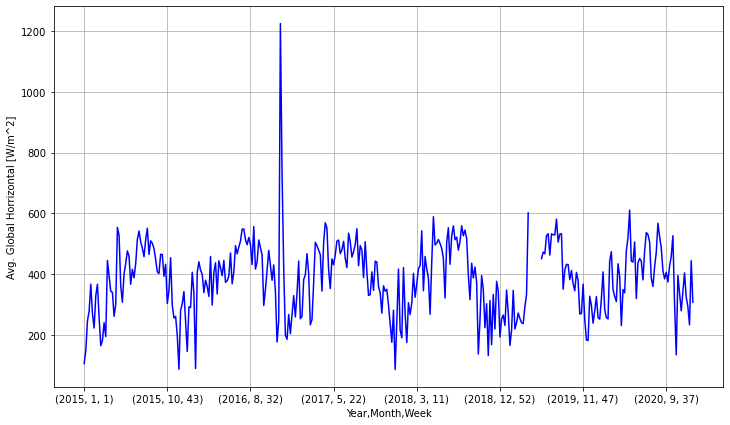

<Figure size 432x288 with 0 Axes>

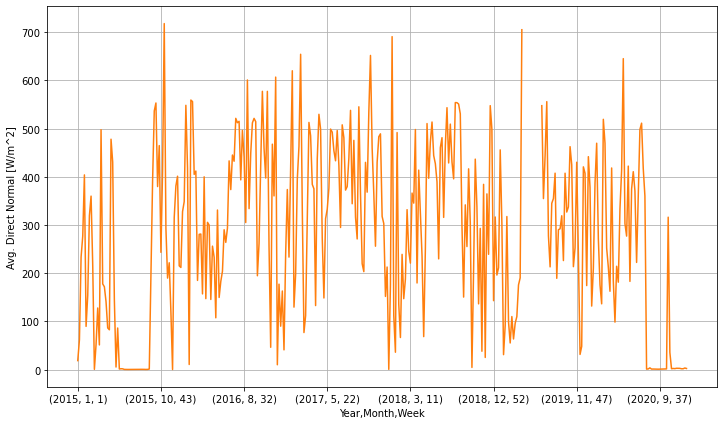

<Figure size 432x288 with 0 Axes>

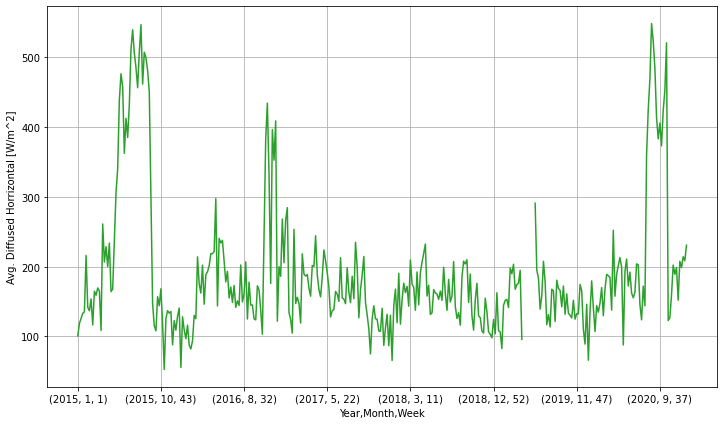

In [26]:
plt.figure()
Avg_Global_Hor.plot(ylabel = 'Avg. Global Horrizontal [W/m^2]', figsize = (12,7), legend = False , color = 'b', grid = True)
#plt.savefig("Avg Global Horizontal.png")

plt.figure()
Avg_Direct_Nor.plot(color = 'tab:orange', ylabel = 'Avg. Direct Normal [W/m^2]', legend = False , figsize = (12,7), grid = True)
#plt.savefig("Avg Direct Plot.png")

plt.figure()
Avg_Diffuse_Hor.plot(legend = False , color = 'tab:green' , ylabel = 'Avg. Diffused Horrizontal [W/m^2]', grid = True , figsize = (12,7))
#plt.savefig("Avg Diffused Plot.png")
                                                                                            

## Meterological Data 

In [27]:
# Load Header Data

#Metar_header = pd.read_csv('HEADERS.txt', sep=" ", header = [1,2])
Metar_header = pd.read_csv('https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/HEADERS.txt', sep=" ", header = None)
Metar_header.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,NaN
1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,NaN
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius,NaN


In [28]:
# Eliminate Last column of bad data

Metar_header = Metar_header.iloc[:, :28]
Metar_header.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius


In [29]:
# Load all Metar data and read as pd DF

Metar1 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2010-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar2 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2011-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar3 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2012-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar4 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2013-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar5 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2014-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar6 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2015-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar7 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2016-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar8 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2017-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar9 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2018-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar10 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2019-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')
Metar11 = pd.read_csv("https://raw.githubusercontent.com/Diego-33/Texas-Global-Warming/main/Temperature%20Data/CRND0103-2020-TX_Edinburg_17_NNE.txt", header= None, sep = '\s+')

Edinburg_Metar = pd.concat([Metar_header, Metar1, Metar2, Metar3, Metar4, Metar5, Metar6, Metar7, Metar8, Metar9, Metar10, Metar11])
Edinburg_Metar.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius
0,12987,20100101,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,12987,20100102,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [30]:
# Format Header for Data Frame

Edinburg_Metar.columns = pd.MultiIndex.from_arrays([Edinburg_Metar.iloc[1],Edinburg_Metar.iloc[2]])
Edinburg_Metar = Edinburg_Metar.iloc[3:].reset_index(drop=True)

Edinburg_Metar.head()

1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius
0,12987,20100101,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,12987,20100102,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,12987,20100103,1.302,-98.06,26.53,17.7,11.7,14.7,14.1,0.5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,12987,20100104,1.302,-98.06,26.53,15.2,4.6,9.9,10.4,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,12987,20100105,1.302,-98.06,26.53,14.6,2.8,8.7,8.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [31]:
# Information about data
Edinburg_Metar.info

<bound method DataFrame.info of 1    WBANNO  LST_DATE CRX_VN       LONGITUDE        LATITUDE T_DAILY_MAX  \
2     XXXXX  YYYYMMDD XXXXXX Decimal_degrees Decimal_degrees     Celsius   
0     12987  20100101  1.302          -98.06           26.53        15.0   
1     12987  20100102  1.302          -98.06           26.53        20.5   
2     12987  20100103  1.302          -98.06           26.53        17.7   
3     12987  20100104  1.302          -98.06           26.53        15.2   
4     12987  20100105  1.302          -98.06           26.53        14.6   
...     ...       ...    ...             ...             ...         ...   
4013  12987  20201227  2.622          -98.06           26.53     -9999.0   
4014  12987  20201228  2.622          -98.06           26.53     -9999.0   
4015  12987  20201229  2.622          -98.06           26.53     -9999.0   
4016  12987  20201230  2.622          -98.06           26.53     -9999.0   
4017  12987  20201231  2.622          -98.06           2

In [32]:
# Understand Column names for analysis
Edinburg_Metar.columns.values

array([('WBANNO', 'XXXXX'), ('LST_DATE', 'YYYYMMDD'),
       ('CRX_VN', 'XXXXXX'), ('LONGITUDE', 'Decimal_degrees'),
       ('LATITUDE', 'Decimal_degrees'), ('T_DAILY_MAX', 'Celsius'),
       ('T_DAILY_MIN', 'Celsius'), ('T_DAILY_MEAN', 'Celsius'),
       ('T_DAILY_AVG', 'Celsius'), ('P_DAILY_CALC', 'mm'),
       ('SOLARAD_DAILY', 'MJ/m^2'), ('SUR_TEMP_DAILY_TYPE', 'X'),
       ('SUR_TEMP_DAILY_MAX', 'Celsius'),
       ('SUR_TEMP_DAILY_MIN', 'Celsius'),
       ('SUR_TEMP_DAILY_AVG', 'Celsius'), ('RH_DAILY_MAX', '%'),
       ('RH_DAILY_MIN', '%'), ('RH_DAILY_AVG', '%'),
       ('SOIL_MOISTURE_5_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_10_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_20_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_50_DAILY', 'm^3/m^3'),
       ('SOIL_MOISTURE_100_DAILY', 'm^3/m^3'),
       ('SOIL_TEMP_5_DAILY', 'Celsius'),
       ('SOIL_TEMP_10_DAILY', 'Celsius'),
       ('SOIL_TEMP_20_DAILY', 'Celsius'),
       ('SOIL_TEMP_50_DAILY', 'Celsius'),
       ('SOIL_TEMP_100_DAIL

In [33]:
# Format Date into Date time format 

Edinburg_Metar[('LST_DATE', 'YYYYMMDD')] = pd.to_datetime(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')] , format='%Y%m%d')
Edinburg_Metar

1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,...,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,m^3/m^3,Celsius,Celsius,Celsius,Celsius,Celsius
0,12987,2010-01-01,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,12987,2010-01-02,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,12987,2010-01-03,1.302,-98.06,26.53,17.7,11.7,14.7,14.1,0.5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,12987,2010-01-04,1.302,-98.06,26.53,15.2,4.6,9.9,10.4,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,12987,2010-01-05,1.302,-98.06,26.53,14.6,2.8,8.7,8.6,0.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,12987,2020-12-27,2.622,-98.06,26.53,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4014,12987,2020-12-28,2.622,-98.06,26.53,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4015,12987,2020-12-29,2.622,-98.06,26.53,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [34]:
# Filter Data out

Edinburg_Metar = Edinburg_Metar.iloc[:, 0:11]

filter1 = Edinburg_Metar.iloc[:,5:11]> -10
Edinburg_Metar.where(filter1, inplace = True)

# Output filtered data
Edinburg_Metar

1,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY
2,XXXXX,YYYYMMDD,XXXXXX,Decimal_degrees,Decimal_degrees,Celsius,Celsius,Celsius,Celsius,mm,MJ/m^2
0,12987,2010-01-01,1.302,-98.06,26.53,15.0,4.1,9.6,9.6,0.0,16.49
1,12987,2010-01-02,1.302,-98.06,26.53,20.5,2.0,11.3,11.2,0.0,14.54
2,12987,2010-01-03,1.302,-98.06,26.53,17.7,11.7,14.7,14.1,0.5,3.49
3,12987,2010-01-04,1.302,-98.06,26.53,15.2,4.6,9.9,10.4,0.0,11.78
4,12987,2010-01-05,1.302,-98.06,26.53,14.6,2.8,8.7,8.6,0.0,9.79
...,...,...,...,...,...,...,...,...,...,...,...
4013,12987,2020-12-27,2.622,-98.06,26.53,NaN,NaN,NaN,NaN,NaN,NaN
4014,12987,2020-12-28,2.622,-98.06,26.53,NaN,NaN,NaN,NaN,NaN,NaN
4015,12987,2020-12-29,2.622,-98.06,26.53,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# See the Data types of the file
# It apears that all data is an object this must be changed in order to continue working with data

Edinburg_Metar.dtypes

1              2              
WBANNO         XXXXX                      object
LST_DATE       YYYYMMDD           datetime64[ns]
CRX_VN         XXXXXX                     object
LONGITUDE      Decimal_degrees            object
LATITUDE       Decimal_degrees            object
T_DAILY_MAX    Celsius                    object
T_DAILY_MIN    Celsius                    object
T_DAILY_MEAN   Celsius                    object
T_DAILY_AVG    Celsius                    object
P_DAILY_CALC   mm                         object
SOLARAD_DAILY  MJ/m^2                     object
dtype: object

In [36]:
# We will only convert data we are interested in using for analysis

Edinburg_Metar[('T_DAILY_MEAN', 'Celsius')] = Edinburg_Metar[('T_DAILY_MEAN', 'Celsius')].astype(float, errors = 'raise')
Edinburg_Metar[('T_DAILY_MAX', 'Celsius')] = Edinburg_Metar[('T_DAILY_MAX', 'Celsius')].astype(float, errors = 'raise')
Edinburg_Metar[('T_DAILY_MIN', 'Celsius')] = Edinburg_Metar[('T_DAILY_MIN', 'Celsius')].astype(float, errors = 'raise')
Edinburg_Metar[('SOLARAD_DAILY', 'MJ/m^2')] = Edinburg_Metar[('SOLARAD_DAILY', 'MJ/m^2')].astype(float, errors = 'raise')

# Check data types now
# Looks like everything is in order for analysis
Edinburg_Metar.dtypes

1              2              
WBANNO         XXXXX                      object
LST_DATE       YYYYMMDD           datetime64[ns]
CRX_VN         XXXXXX                     object
LONGITUDE      Decimal_degrees            object
LATITUDE       Decimal_degrees            object
T_DAILY_MAX    Celsius                   float64
T_DAILY_MIN    Celsius                   float64
T_DAILY_MEAN   Celsius                   float64
T_DAILY_AVG    Celsius                    object
P_DAILY_CALC   mm                         object
SOLARAD_DAILY  MJ/m^2                    float64
dtype: object

<AxesSubplot:xlabel='(LST_DATE, YYYYMMDD)', ylabel='Solar Radiation Daily [MJ/m^2]'>

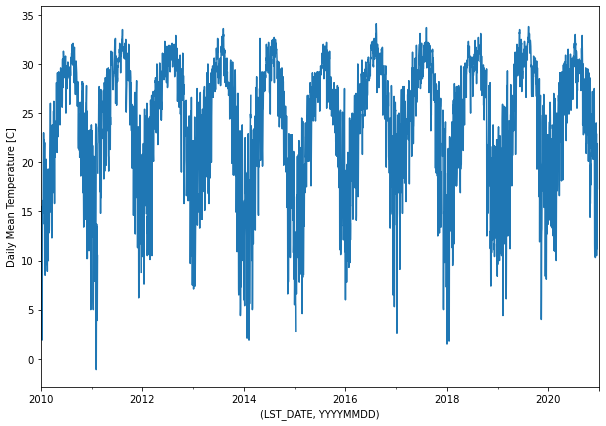

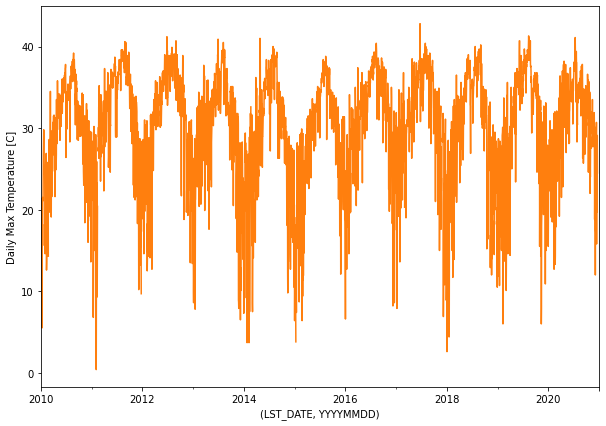

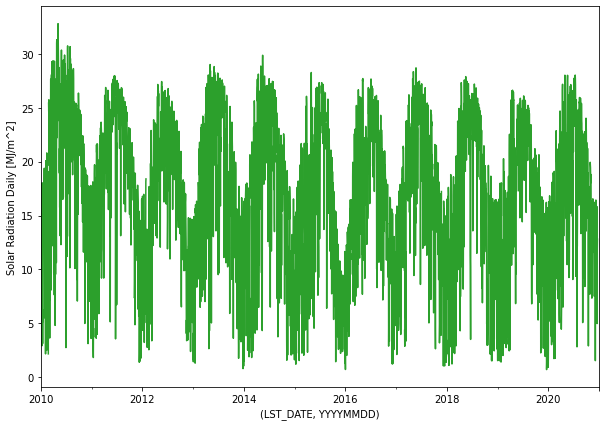

In [37]:
# Visualize Data

Edinburg_Metar.plot(x=('LST_DATE', 'YYYYMMDD') , y = ('T_DAILY_MEAN', 'Celsius'),  ylabel = 'Daily Mean Temperature [C]',
                      figsize = (10,7), legend = False)
#plt.savefig("Daily Mean Plot.png")

Edinburg_Metar.plot(x=('LST_DATE', 'YYYYMMDD') , y = ('T_DAILY_MAX', 'Celsius'),  ylabel = 'Daily Max Temperature [C]',
                      figsize = (10,7), legend = False , color = 'tab:orange')
#plt.savefig("Daily Max Plot.png")

Edinburg_Metar.plot(x=('LST_DATE', 'YYYYMMDD') , y = ('SOLARAD_DAILY', 'MJ/m^2'),  ylabel = 'Solar Radiation Daily [MJ/m^2]',
                      figsize = (10,7), legend = False , color = 'tab:green')
#plt.savefig("Solar Radiation Plot.png")


In [38]:
# Clean up data by grouping by Weekly average per year

Avg_Daily_Temp = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month),
                                         (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.isocalendar().week)
                                        ]).agg({('T_DAILY_MEAN', 'Celsius') : ['mean']}).rename_axis(["Year","Month","Week"])

Avg_Max_Temp = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month),
                                       (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.isocalendar().week)
                                        ]).agg({('T_DAILY_MAX', 'Celsius') : ['mean']}).rename_axis(["Year","Month","Week"])

Avg_Min_Temp = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month),
                                       (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.isocalendar().week)
                                        ]).agg({('T_DAILY_MIN', 'Celsius') : ['mean']}).rename_axis(["Year","Month","Week"])

Avg_Solar_Rad = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year), 
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month),
                                        (Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.isocalendar().week)
                                        ]).agg({('SOLARAD_DAILY', 'MJ/m^2') : ['mean']}).rename_axis(["Year","Month","Week"])

Avg_Daily_Temp

T_DAILY_MEAN
                     Celsius
                        mean
Year Month Week             
2010 1     1        7.928571
           2       14.400000
           3       20.828571
           4       15.400000
           53      11.866667
...                      ...
2020 12    49      13.466667
           50      18.814286
           51      14.914286
           52            NaN
           53            NaN

[688 rows x 1 columns]

Text(0.5, 1.0, 'Edinburg, Tx')

<Figure size 432x288 with 0 Axes>

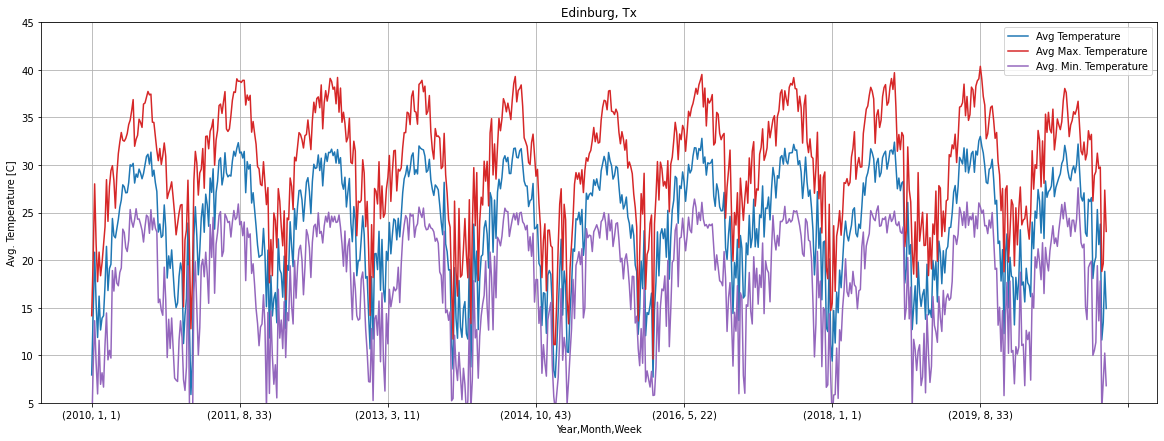

<Figure size 432x288 with 0 Axes>

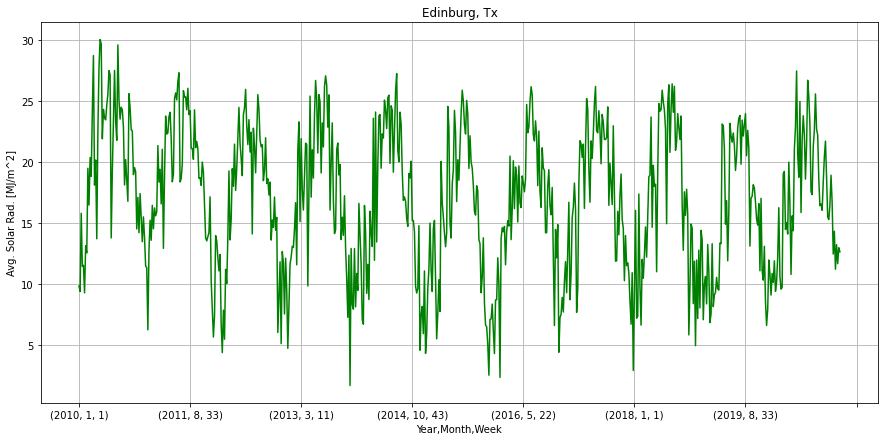

In [39]:
# Visualize Formatted Data

plt.figure()
ax = Avg_Daily_Temp.plot(ylabel = 'Avg. Temperature [C]', figsize = (20,7), legend = False , color = 'tab:blue')
Avg_Max_Temp.plot(color = 'tab:red', ax = ax , legend = False , grid = True)
Avg_Min_Temp.plot(color = 'tab:purple', ax = ax , legend = False , grid = True)
ax.legend([('Avg Temperature'), ('Avg Max. Temperature') , ('Avg. Min. Temperature')])
plt.ylim([5,45])
plt.title('Edinburg, Tx')

#plt.savefig("Avg Temperature Plot.png")

plt.figure()
Avg_Solar_Rad.plot(ylabel = 'Avg. Solar Rad. [MJ/m^2]', figsize = (15,7), legend = False , grid = True, color = 'green')
plt.title('Edinburg, Tx')

#plt.savefig("Solar Radiation Avg Plot.png")

In [40]:
# PLOT YEARLY AVERAGE DAILY TEMP
# PLOT YEARLY AVERAGE OF DAILY TEMP VS. GLOBAL HORIZONTAL DATA
# IS THERE ANY DETECTION OF GLOBAL WARMING
Avg_Daily_Temp_YR = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)
                                        ]).agg({('T_DAILY_MEAN', 'Celsius') : ['mean']}).rename_axis(["Year"])
Avg_Max_Temp_YR = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)
                                        ]).agg({('T_DAILY_MAX', 'Celsius') : ['mean']}).rename_axis(["Year"])
Avg_Solar_Rad_YR = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)
                                        ]).agg({('SOLARAD_DAILY', 'MJ/m^2') : ['mean']}).rename_axis(["Year"])

Text(0.5, 1.0, 'Edinburg, Tx')

<Figure size 432x288 with 0 Axes>

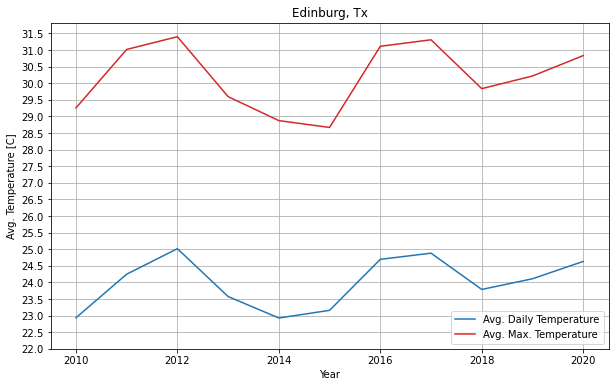

In [41]:
plt.figure()
ax = Avg_Daily_Temp_YR.plot(ylabel = 'Avg. Temperature [C]', figsize = (10,6), legend = False , color = 'tab:blue')
Avg_Max_Temp_YR.plot(color = 'tab:red', ax = ax , legend = False , grid = True)
ax.legend([('Avg. Daily Temperature'), ('Avg. Max. Temperature') ])
plt.yticks(np.arange(22,32,.5))
plt.title('Edinburg, Tx')
#plt.savefig("Yearly Avg. Temperature Increase.png")

Text(0.5, 1.0, 'Edinburg, Tx')

<Figure size 432x288 with 0 Axes>

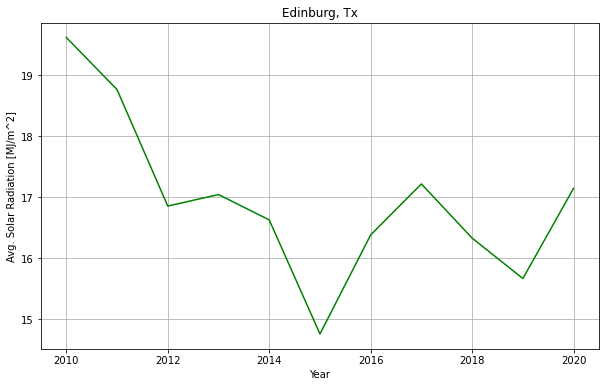

In [42]:
plt.figure()
ax = Avg_Solar_Rad_YR.plot(ylabel = 'Avg. Solar Radiation [MJ/m^2]', figsize = (10,6), legend = False , grid = True, color = 'green')
plt.title('Edinburg, Tx')

# Analyze Data

## Histograms of all Data

### Pollution Data

mu = 0.02516310475128539
sigma =  0.01229224661710751


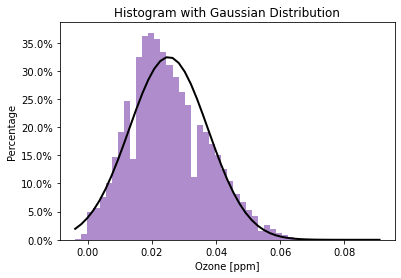

In [43]:
# Create Histogram of total data collected
Value_poll = pd.concat([Tx_Air_Pollution.iloc[:,7]], axis = 1)

_, bins, _ = plt.hist(Value_poll, 50, density = True, alpha = 0.75 , color = 'tab:purple')
mu , sigma = scipy.stats.norm.fit(Value_poll)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line , linewidth = 2 , color = 'black')
plt.ylabel('Percentage')
plt.xlabel('Ozone [ppm]')
plt.title('Histogram with Gaussian Distribution')
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))

print('mu =', mu)
print('sigma = ', sigma)
#plt.savefig("O3 Histogram.png")

### Solar Irradiance Data

mu = 389.7685286542078
sigma =  301.9619850351619


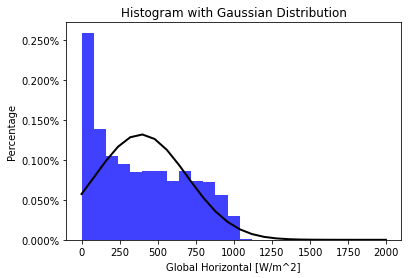

In [44]:
# Create Histogram of Global Horrizontal data collected
Value_global = pd.concat([Solar_irradiance.iloc[:,2]], axis = 1).dropna()

_, bins, _ = plt.hist(Value_global, 25, density = True, alpha = 0.75 , color = 'b')
mu , sigma = scipy.stats.norm.fit(Value_global)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line , linewidth = 2, color = 'black')
plt.ylabel('Percentage')
plt.xlabel('Global Horizontal [W/m^2]')
plt.title('Histogram with Gaussian Distribution')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

print('mu =', mu)
print('sigma = ', sigma)
#plt.savefig("Global Horizontal Histogram.png")

mu = 283.4238721624665
sigma =  311.6354080464012


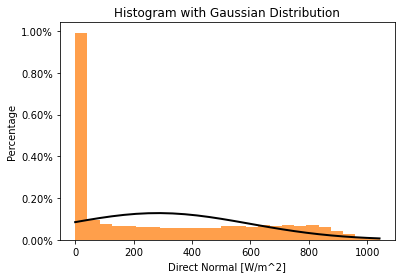

In [45]:
# Create Histogram of Direct Normal data collected
Value_direct = pd.concat([Solar_irradiance.iloc[:,3]], axis = 1).dropna()

_, bins, _ = plt.hist(Value_direct, 25, density = True, alpha = 0.75 , weights = np.ones(len(Value_direct))/len(Value_direct) , color = 'tab:orange')
mu , sigma = scipy.stats.norm.fit(Value_direct)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line , linewidth = 2 , color = 'black')
plt.ylabel('Percentage')
plt.xlabel('Direct Normal [W/m^2]')
plt.title('Histogram with Gaussian Distribution')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

print('mu =', mu)
print('sigma = ', sigma)
#plt.savefig("Direct Normal Histogram.png")

mu = 192.90171281317927
sigma =  180.83466591465842


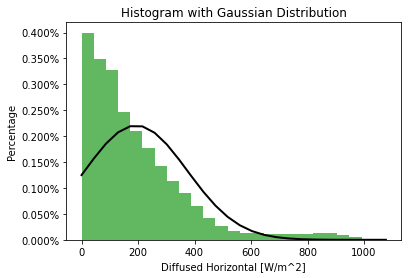

In [46]:
# Create Histogram of Diffused Horizontal data collected
Value_diffused = pd.concat([Solar_irradiance.iloc[:,4]], axis = 1).dropna()

_, bins, _ = plt.hist(Value_diffused, 25, density = True, alpha = 0.75 , color = 'tab:green')
mu , sigma = scipy.stats.norm.fit(Value_diffused)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line , linewidth = 2, color = 'black')
plt.ylabel('Percentage')
plt.xlabel('Diffused Horizontal [W/m^2]')
plt.title('Histogram with Gaussian Distribution')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

print('mu =', mu)
print('sigma = ', sigma)
#plt.savefig("Diffused Horizontal Histogram.png")

### Meteorlogical Data

mu = 23.99417962870045
sigma =  6.559104184934659


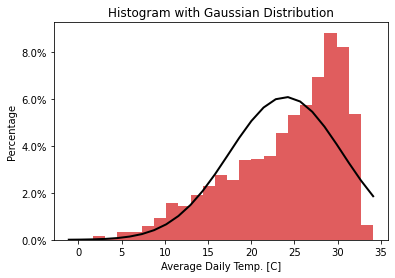

In [47]:
# Create Histogram of Average Daily Temperature data collected
Value_Temp = pd.concat([Edinburg_Metar.iloc[:,7]], axis = 1).dropna()

_, bins, _ = plt.hist(Value_Temp, 25, density = True, alpha = 0.75 , color = 'tab:red')
mu , sigma = scipy.stats.norm.fit(Value_Temp)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line , linewidth = 2, color = 'black')
plt.ylabel('Percentage')
plt.xlabel('Average Daily Temp. [C]')
plt.title('Histogram with Gaussian Distribution')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

print('mu =', mu)
print('sigma = ', sigma)
#plt.savefig("Avg Daily Temp Histogram.png")

mu = 16.945691729323308
sigma =  7.052453144018626


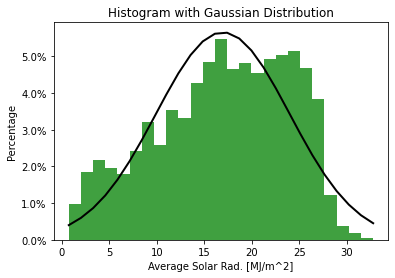

In [48]:
# Create Histogram of Solar Radiation data collected
Value_Rad = pd.concat([Edinburg_Metar.iloc[:,10]], axis = 1).dropna()

_, bins, _ = plt.hist(Value_Rad, 25, density = True, alpha = 0.75 , color = 'g')
mu , sigma = scipy.stats.norm.fit(Value_Rad)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line , linewidth = 2, color = 'black')
plt.ylabel('Percentage')
plt.xlabel('Average Solar Rad. [MJ/m^2]')
plt.title('Histogram with Gaussian Distribution')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

print('mu =', mu)
print('sigma = ', sigma)
#plt.savefig("Avg Solar Rad Histogram.png")

## Correlations

In [49]:
# Format Data for correlation data 
# We are interested in looking at the data over a uniform time period
# The following are the names of data: Tx_Air_sep , Avg_Global_Hor, Avg_Direct_Nor , Avg_Diffuse_Hor, Avg_Daily_Temp, Avg_Max_Temp, Avg_Solar_Rad
Total_Data = pd.concat([Tx_Air_sep, Avg_Global_Hor,Avg_Direct_Nor, Avg_Diffuse_Hor, Avg_Daily_Temp, Avg_Max_Temp, Avg_Solar_Rad ], axis = 1)
Total_Data.head(25)

value Avg Global Horizontal [W/m^2] Avg Direct Normal [W/m^2]  \
                 mean                          mean                      mean   
Year Month Week                                                                 
2010 1     1      NaN                           NaN                       NaN   
           2      NaN                           NaN                       NaN   
           3      NaN                           NaN                       NaN   
           4      NaN                           NaN                       NaN   
           53     NaN                           NaN                       NaN   
     2     5      NaN                           NaN                       NaN   
           6      NaN                           NaN                       NaN   
           7      NaN                           NaN                       NaN   
           8      NaN                           NaN                       NaN   
     3     9      NaN                           NaN                       NaN   
           10     NaN                           NaN                       NaN   
           11     NaN                           NaN                       NaN   
           12     NaN                           NaN                       NaN   
           13     NaN                           NaN                       NaN   
     4     13     NaN                           NaN                       NaN   
           14     NaN                           NaN                       NaN   
           15     NaN                           NaN                       NaN   
           16     NaN                           NaN                       NaN   
           17     NaN                           NaN                       NaN   
     5     17     NaN                           NaN                       NaN   
           18     NaN                           NaN                       NaN   
           19     NaN                           NaN                       NaN   
           20     NaN                           NaN                       NaN   
           21     NaN                           NaN                       NaN   
           22     NaN                           NaN                       NaN   

                Avg Diffuse Horizontal [W/m^2] T_DAILY_MEAN T_DAILY_MAX  \
                                          mean      Celsius     Celsius   
Year Month Week                                                           
2010 1     1                               NaN     7.928571   14.157143   
           2                               NaN    14.400000   20.085714   
           3                               NaN    20.828571   28.014286   
           4                               NaN    15.400000   21.671429   
           53                              NaN    11.866667   17.733333   
     2     5                               NaN    16.214286   20.842857   
           6                               NaN    12.657143   18.357143   
           7                               NaN    13.900000   19.700000   
           8                               NaN    14.150000   21.666667   
     3     9                               NaN    17.300000   23.485714   
           10                              NaN    21.442857   28.457143   
           11                              NaN    16.800000   24.071429   
           12                              NaN    19.114286   27.728571   
           13                              NaN    19.566667   29.400000   
     4     13                              NaN    24.375000   29.925000   
           14                              NaN    22.557143   28.385714   
           15                              NaN    22.342857   25.457143   
           16                              NaN    23.314286   29.014286   
           17                              NaN    24.280000   31.200000   
     5     17                              NaN    25.550000   32.400000   
           18         

In [50]:
# Remove unmatching data for correlation analysis
Total_Data = Total_Data.dropna()

# Rename Columns
Total_Data.columns = ['O3', 'Avg. Global Horiz.', 'Avg. Direct Norm.', 'Avg. Diffuse Horiz.', 'Avg. Daily Temp.', 'Max Daily Temp.',
                            'Daily Solar Rad.']

# Show Data set used for Correlation
Total_Data

O3  Avg. Global Horiz.  Avg. Direct Norm.  \
Year Month Week                                                    
2016 3     9     0.031200          380.395107         280.665458   
           10    0.030716          360.552569         281.265745   
           11    0.025363          327.131824         157.088446   
           12    0.034700          458.627309         399.979538   
           13    0.025466          298.628131         147.265645   
...                   ...                 ...                ...   
2020 9     37    0.019704          406.850086           0.986042   
           38    0.026036          374.722462           0.981694   
           39    0.027757          427.076898           1.083408   
           40    0.025846          458.360750           1.166604   
     10    40    0.036349          526.710332           1.478688   

                 Avg. Diffuse Horiz.  Avg. Daily Temp.  Max Daily Temp.  \
Year Month Week                                                           
2016 3     9              175.435131         23.300000        29.620000   
           10             162.007087         22.257143        27.785714   
           11             202.026085         23.285714        28.271429   
           12             146.032626         20.300000        27.557143   
           13             188.180052         25.225000        30.450000   
...                              ...               ...              ...   
2020 9     37             405.866407         26.657143        31.457143   
           38             373.143544         26.214286        31.071429   
           39             423.972584         27.071429        32.414286   
           40             452.557729         22.866667        30.533333   
     10    40             520.887073         22.500000        31.200000   

                 Daily Solar Rad.  
Year Month Week                    
2016 3     9            14.240000  
           10           15.171429  
           11           14.720000  
           12           20.457143  
           13           13.612500  
...                           ...  
2020 9     37           16.528571  
           38           16.015714  
           39           18.325714  
           40           20.396667  
     10    40           21.685000  

[259 rows x 7 columns]

Total Data Correlation Analysis:


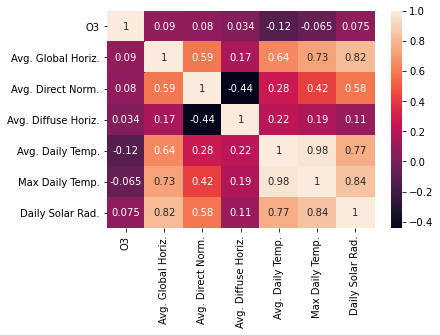

In [51]:
# Perform Data Correlation Analysis
Data_corr = Total_Data.corr()
print('Total Data Correlation Analysis:')
seaborn.heatmap(Data_corr, annot=True) #creating a visualization to the correlation
plt.show()

#plt.savefig("Overall Avg Correlation.png")

Try correlation but with monthly average data

In [52]:
# Obtain weekly average data from each data set group

Tx_Air_m = Tx_Air_Pollution.groupby([(Tx_Air_Pollution['date time'].dt.month)
                                       ]).agg({'value' : ['mean']}).rename_axis(["Month"])

Avg_Global_Hor_m = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month)
                                               ]).agg({'Avg Global Horizontal [W/m^2]' : ['mean']}).rename_axis(["Month"])

Avg_Direct_Nor_m = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month)
                                               ]).agg({'Avg Direct Normal [W/m^2]' : ['mean']}).rename_axis(["Month"])

Avg_Diffuse_Hor_m = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.month)
                                                ]).agg({'Avg Diffuse Horizontal [W/m^2]' : ['mean']}).rename_axis(["Month"])

Avg_Daily_Temp_m = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month)
                                             ]).agg({('T_DAILY_MEAN', 'Celsius') : ['mean']}).rename_axis(["Month"])

Avg_Max_Temp_m = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month)
                                           ]).agg({('T_DAILY_MAX', 'Celsius') : ['mean']}).rename_axis(["Month"])

Avg_Solar_Rad_m = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.month)
                                            ]).agg({('SOLARAD_DAILY', 'MJ/m^2') : ['mean']}).rename_axis(["Month"])

In [53]:
# Combine all into one dataframe
Total_Data_month = pd.concat([Tx_Air_m, Avg_Global_Hor_m, Avg_Direct_Nor_m, Avg_Diffuse_Hor_m, Avg_Daily_Temp_m, Avg_Max_Temp_m, Avg_Solar_Rad_m ], axis = 1)

# Remove unmatching data for correlation analysis
Total_Data_month = Total_Data_month.dropna()

# Rename Columns
Total_Data_month.columns = ['O3', 'Avg. Global Horiz.', 'Avg. Direct Norm.', 'Avg. Diffuse Horiz.', 'Avg. Daily Temp.', 'Max Daily Temp.',
                            'Daily Solar Rad.']

# Show Data set used for Correlation
Total_Data_month.head()

,O3,Avg. Global Horiz.,Avg. Direct Norm.,Avg. Diffuse Horiz.,Avg. Daily Temp.,Max Daily Temp.,Daily Solar Rad.
Month,,,,,,,
1,0.024189,283.198866,295.558419,134.081660,15.396460,21.831858,10.843618
2,0.024082,316.049231,263.854295,144.139249,18.090850,24.331699,12.578889
3,0.030628,337.558096,206.289797,176.106675,21.429464,27.478869,15.809524
4,0.033316,399.573740,250.876862,198.601462,24.450303,30.691818,18.962606
5,0.029845,437.629378,282.846832,214.084959,27.259238,33.030792,20.874018


Monthly Avg. Correlation Analysis:


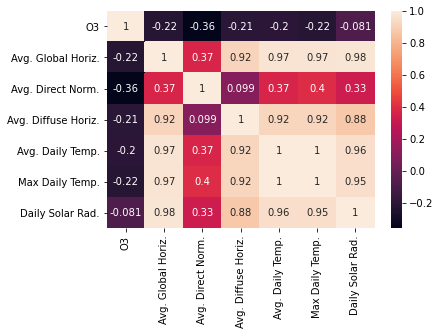

In [54]:
# Perform Data Correlation Analysis
Data_corr_month = Total_Data_month.corr()
print('Monthly Avg. Correlation Analysis:')
seaborn.heatmap(Data_corr_month, annot=True) #creating a visualization to the correlation
plt.show()

#plt.savefig("Monthly Avg Correlation.png")

In [55]:
# Yearly Correlation
Tx_Air_y = Tx_Air_Pollution.groupby([(Tx_Air_Pollution['date time'].dt.year)
                                       ]).agg({'value' : ['mean']}).rename_axis(["Year"])

Avg_Global_Hor_y = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year)
                                               ]).agg({'Avg Global Horizontal [W/m^2]' : ['mean']}).rename_axis(["Year"])

Avg_Direct_Nor_y = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year)
                                               ]).agg({'Avg Direct Normal [W/m^2]' : ['mean']}).rename_axis(["Year"])

Avg_Diffuse_Hor_y = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.year)
                                                ]).agg({'Avg Diffuse Horizontal [W/m^2]' : ['mean']}).rename_axis(["Year"])

Avg_Daily_Temp_y = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)
                                             ]).agg({('T_DAILY_MEAN', 'Celsius') : ['mean']}).rename_axis(["Year"])

Avg_Max_Temp_y = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)
                                           ]).agg({('T_DAILY_MAX', 'Celsius') : ['mean']}).rename_axis(["Year"])

Avg_Solar_Rad_y = Edinburg_Metar.groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)
                                            ]).agg({('SOLARAD_DAILY', 'MJ/m^2') : ['mean']}).rename_axis(["Year"])

# Combine all into one dataframe
Total_Data_year = pd.concat([Tx_Air_y, Avg_Global_Hor_y, Avg_Direct_Nor_y, Avg_Diffuse_Hor_y, Avg_Daily_Temp_y, Avg_Max_Temp_y, Avg_Solar_Rad_y ], axis = 1)

# Remove unmatching data for correlation analysis
Total_Data_year = Total_Data_year.dropna()

# Rename Columns
Total_Data_year.columns = ['O3', 'Avg. Global Horiz.', 'Avg. Direct Norm.', 'Avg. Diffuse Horiz.', 'Avg. Daily Temp.', 'Max Daily Temp.',
                            'Daily Solar Rad.']

# Show Data set used for Correlation
Total_Data_year.head()

,O3,Avg. Global Horiz.,Avg. Direct Norm.,Avg. Diffuse Horiz.,Avg. Daily Temp.,Max Daily Temp.,Daily Solar Rad.
Year,,,,,,,
2016,0.023169,410.261650,346.819499,183.531358,24.695317,31.114011,16.383068
2017,0.026727,406.401753,375.441783,161.558341,24.881006,31.309777,17.217486
2018,0.022991,389.221238,324.280933,157.150660,23.788187,29.837637,16.330192
2019,0.025255,371.085332,278.366692,150.741994,24.110165,30.218956,15.668407
2020,0.026121,404.717076,250.668461,235.240923,24.631921,30.833616,17.146554


Yearly Avg. Correlation Analysis:


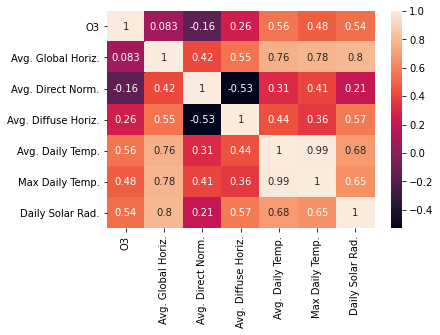

In [56]:
# Perform Data Correlation Analysis
Data_corr_year = Total_Data_year.corr()
print('Yearly Avg. Correlation Analysis:')
seaborn.heatmap(Data_corr_year, annot=True) #creating a visualization to the correlation
plt.show()

#plt.savefig("Yearly Avg Correlation.png")

### Non-Linear Correlation

In [57]:
# Seperate Data into weekly averages (NOT TIME DEPENDANT)

O3_weekly = Tx_Air_Pollution['value'].groupby([(Tx_Air_Pollution['date time'].dt.isocalendar().week)]).mean().rename("Week")

Weekly_Avg_Temp = Edinburg_Metar[('T_DAILY_MEAN', 'Celsius')].groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.isocalendar().week)
                                         ]).mean().rename("Week")

Solar_Rad_Week = Edinburg_Metar[('SOLARAD_DAILY', 'MJ/m^2')].groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.isocalendar().week)
                                                                     ]).mean().rename("Week")

Global_Hor_Week = Solar_irradiance.groupby([(Solar_irradiance['DATE (MM/DD/YYYY)'].dt.isocalendar().week)
                                           ])['Avg Global Horizontal [W/m^2]'].mean().rename("Week")
                                                                                                             
Solar_Rad_Week.head()


week
1     8.968182
2    10.007532
3    11.240260
4    11.816053
5    11.853026
Name: Week, dtype: float64

In [58]:
#creating linear regression calculation
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 

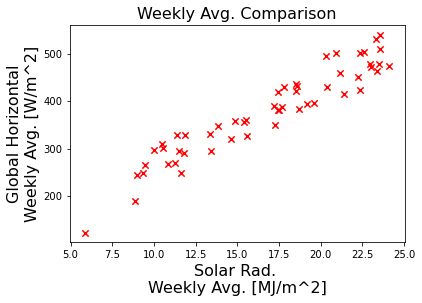

In [59]:
#Plot weekly average data for comparison
x = Solar_Rad_Week
y = Global_Hor_Week
plt.scatter(x, y, c = "r", marker = "x", s = 40) 
plt.xlabel('Solar Rad. \nWeekly Avg. [MJ/m^2]',fontsize=16) 
plt.ylabel('Global Horizontal\nWeekly Avg. [W/m^2]',fontsize=16) 
plt.title('Weekly Avg. Comparison',fontsize=16)
plt.show()

#plt.savefig("Orignal Global vs Avg Solar Rad.png")

In [60]:
# Linear Regression Calucation of coef.
a02, a12, r22 = calculate_linear_regression_coef(x,y)
print("The intercept (\u03B1) is", a02)
print("The slope (\u03B2) is", a12)
print("R-squared (r^2) is", r22)

The intercept (α) is 84.61590000797145
The slope (β) is 17.544819925150758
R-squared (r^2) is 0.9004868264148277


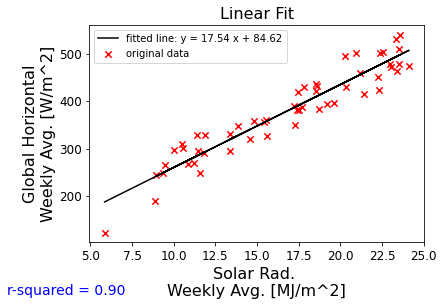

In [61]:
# plotting the original data points
# plt.figure(figsize = (12, 12))
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred2 = a02 + a12*x

# plotting the regression line 
plt.plot(x, y_pred2, color = "k", label='fitted line: y = %.2f x + %.2f'%(a12, a02)) 

plt.text(0.015, -8.5,'r-squared = %.2f'%r22, fontsize=14, c = "b")
plt.xlabel('Solar Rad. \nWeekly Avg. [MJ/m^2]',fontsize=16) 
plt.ylabel('Global Horizontal\nWeekly Avg. [W/m^2]',fontsize=16) 
plt.title('Linear Fit',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=10,frameon=True)

plt.show()

#plt.savefig("Linear Fit Global vs Avg Solar Rad.png")

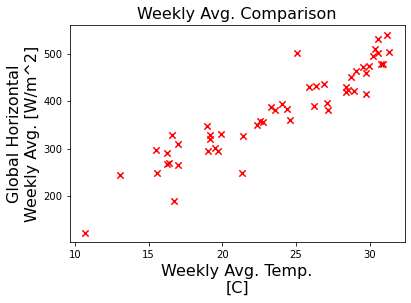

In [62]:
# Plot and compare weekly averages between chosen data

x = Weekly_Avg_Temp
y = Global_Hor_Week
plt.scatter(x, y, color = "r", marker = "x", s = 40) 
plt.xlabel('Weekly Avg. Temp.\n[C]',fontsize=16) 
plt.ylabel('Global Horizontal\nWeekly Avg. [W/m^2]',fontsize=16) 
plt.title('Weekly Avg. Comparison',fontsize=16)
plt.show()

#plt.savefig("Orignal Global vs Avg Temp.png")

In [63]:
# Linear Regression Calucation of coef.
#log_y = np.log(y)
a02, a12, r22 = calculate_linear_regression_coef(x,y)
print("The intercept (\u03B1) is", a02)
print("The slope (\u03B2) is", a12)
print("R-squared (r^2) is", r22)

The intercept (α) is 15.660220351594376
The slope (β) is 15.269422644017686
R-squared (r^2) is 0.8645310498021255


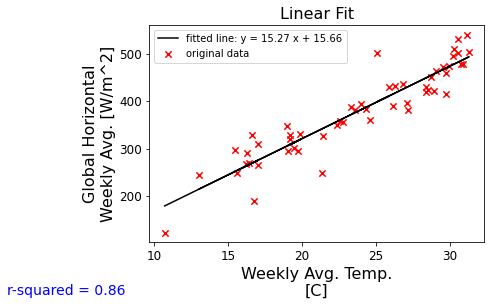

In [64]:
# plotting the original data points
# plt.figure(figsize = (12, 12))
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred2 = a02 + a12*x

# plotting the regression line 
plt.plot(x, y_pred2, color = "k", label='fitted line: y = %.2f x + %.2f'%(a12, a02)) 

plt.text(0.015, -8.5,'r-squared = %.2f'%r22, fontsize=14, c = "b")
plt.xlabel('Weekly Avg. Temp.\n[C]',fontsize=16) 
plt.ylabel('Global Horizontal\nWeekly Avg. [W/m^2]',fontsize=16) 
plt.title('Linear Fit',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=10,frameon=True)

plt.show()

#plt.savefig("Linear Fit Global vs Avg Temp.png")

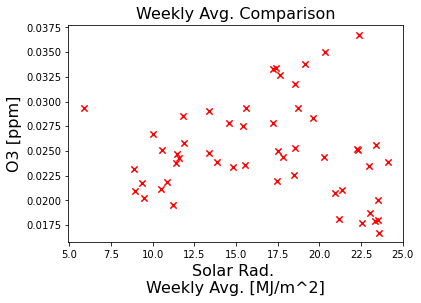

In [65]:
#Plot weekly average data for comparison
x = Solar_Rad_Week
y = O3_weekly
plt.scatter(x, y, c = "r", marker = "x", s = 40) 
plt.xlabel('Solar Rad. \nWeekly Avg. [MJ/m^2]',fontsize=16) 
plt.ylabel('O3 [ppm]',fontsize=16) 
plt.title('Weekly Avg. Comparison',fontsize=16)
plt.show()

#plt.savefig("Orignal O3 vs Avg Solar Rad.png")

In [66]:
# Linear Regression Calucation of coef.
a02, a12, r22 = calculate_linear_regression_coef(x,y)
print("The intercept (\u03B1) is", a02)
print("The slope (\u03B2) is", a12)
print("R-squared (r^2) is", r22)

The intercept (α) is 0.026140643928191064
The slope (β) is -6.859195472115803e-05
R-squared (r^2) is 0.0052226833014564315


No Fit would be possible with the data

In [67]:
# Yearly data for regression fitting
O3_year = Tx_Air_Pollution['value'].groupby([(Tx_Air_Pollution['date time'].dt.year)]).mean().rename("Year")

Solar_Rad_year = Edinburg_Metar[('SOLARAD_DAILY', 'MJ/m^2')].groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)]).mean().rename("Year")

Yearly_Avg_Temp = Edinburg_Metar[('T_DAILY_MEAN', 'Celsius')].groupby([(Edinburg_Metar[('LST_DATE', 'YYYYMMDD')].dt.year)
                                         ]).mean().rename("Year")                                                                     

Solar_Rad_year = Solar_Rad_year.iloc[[6,7,8,9,10]]
O3_year = O3_year.iloc[[0,1,2,3,4]]
Yearly_Avg_Temp = Yearly_Avg_Temp.iloc[[6,7,8,9,10]]


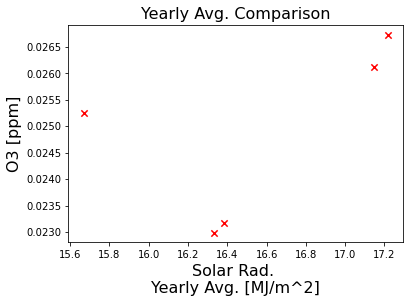

In [68]:
#Plot weekly average data for comparison
x = Solar_Rad_year
y = O3_year
plt.scatter(x, y, c = "r", marker = "x", s = 40) 
plt.xlabel('Solar Rad. \nYearly Avg. [MJ/m^2]',fontsize=16) 
plt.ylabel('O3 [ppm]',fontsize=16) 
plt.title('Yearly Avg. Comparison',fontsize=16)
plt.show()



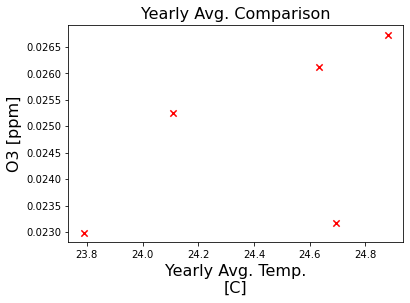

In [69]:
#Plot weekly average data for comparison
x = Yearly_Avg_Temp
y = O3_year
plt.scatter(x, y, c = "r", marker = "x", s = 40) 
plt.xlabel('Yearly Avg. Temp.\n[C]',fontsize=16) 
plt.ylabel('O3 [ppm]',fontsize=16) 
plt.title('Yearly Avg. Comparison',fontsize=16)
plt.show()



In [70]:
# Linear Regression Calucation of coef.
a02, a12, r22 = calculate_linear_regression_coef(x,y)
print("The intercept (\u03B1) is", a02)
print("The slope (\u03B2) is", a12)
print("R-squared (r^2) is", r22)

The intercept (α) is -0.025872231870334356
The slope (β) is 0.0020770778376382345
R-squared (r^2) is 0.30847856001077645


# Satalite Imagery using METPY

## Satalite Data for Land Surface Temperature

In [71]:
# Define Date Time
dt = datetime.utcnow() - timedelta(days=2.5)

In [72]:
# Use TDS catalog for data
sat_catalog_LST = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products'
                         '/LandSurfaceTemperature/CONUS/current/catalog.xml')

In [73]:
list(sat_catalog_LST.datasets)[:5]

['OR_ABI-L2-LSTC-M6_G16_s20211310501163_e20211310503536_c20211310504347.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211310401163_e20211310403536_c20211310404341.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211310301163_e20211310303536_c20211310304333.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211310201164_e20211310203537_c20211310204329.nc',
 'OR_ABI-L2-LSTC-M6_G16_s20211310101164_e20211310103537_c20211310104366.nc']

In [74]:
# Display Date time
dt

datetime.datetime(2021, 5, 8, 17, 24, 31, 622503)

In [75]:
# Establish Satalite Date time
nearest_sat_time = dt.replace(minute = (dt.minute // 5 * 5) + 1)

In [76]:
# Display Satalite Date Time
nearest_sat_time

datetime.datetime(2021, 5, 8, 17, 21, 31, 622503)

In [77]:
# Create Time string
time_str = nearest_sat_time.strftime('s%Y%j%H%M160')

In [78]:
# Find Index that matches with date time
for i, dataset in enumerate(sat_catalog_LST.datasets):
     if time_str in dataset:
            sat_index = i
print(i)
sat_index = i

287


In [79]:
# Using above information about Index, pinpoint satalite data
sat_data_LST = sat_catalog_LST.datasets[sat_index].remote_access(use_xarray=True)

C:\Users\Diego\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'LST' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  new_vars[k] = decode_cf_variable(
C:\Users\Diego\anaconda3\lib\site-packages\xarray\conventions.py:512: SerializationWarning: variable 'DQF' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  new_vars[k] = decode_cf_variable(


In [80]:
# Info about satalite data
sat_data_LST.head()

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 5, y: 5)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 0.1282 ... 0.128
  * x                                       (x) float32 -0.1013 ... -0.1011
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/25)
    LST                                     (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    standard_deviation_lst                  float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2021-04-29T02:01:14.6Z
    time_coverage_end:         2021-04-29T02:03:51.8Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        ea7696a0-9bbc-4719-9591-c76a7ba5d378

In [81]:
# Pull L.S.T. data from satalite data
LST = sat_data_LST.metpy.parse_cf("LST")

Land Surface Temperature Plot

Text(0.5, 1.0, '2021-05-08 17Z')

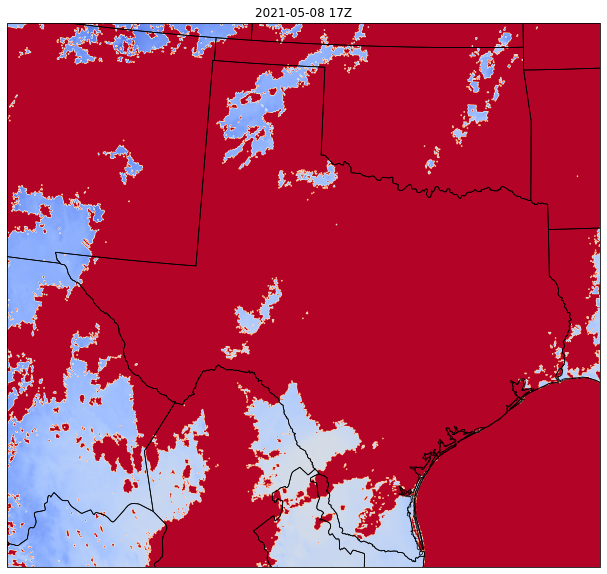

In [82]:
# Establish new figure with size
fig = plt.figure(figsize=(20,10))

# Format figure
ax = fig.add_subplot(1,1,1,projection = ccrs.LambertConformal())
ax.set_extent((-107,-93,25.7,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.75)

# Satellite Land Surface Temperature
# Adjust the regrid_shape to about 1000 so that code can run faster
image_extent = (LST.metpy.x[0], LST.metpy.x[-1], LST.metpy.y[0], LST.metpy.y[-1])
ax.imshow(LST, extent=image_extent, origin='lower', cmap='coolwarm',
          regrid_shape=5000, transform=LST.metpy.cartopy_crs)

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Land Surface Temperature pt2.png")

## Satalite Data for Cloud and Moisture Images

In [83]:
# Use TDS catalog for Cloud and Moisture Images
sat_catalog_CMI = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
                             'CloudAndMoistureImagery/CONUS/Channel02/current/catalog.xml')

In [84]:
# Show data in catalog
list(sat_catalog_CMI.datasets)[:5]

['OR_ABI-L2-CMIPC-M6C02_G16_s20211310521160_e20211310521160_c20211310521160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211310516160_e20211310516160_c20211310516160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211310511160_e20211310511160_c20211310511160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211310506160_e20211310506160_c20211310506160.nc',
 'OR_ABI-L2-CMIPC-M6C02_G16_s20211310501160_e20211310501160_c20211310501160.nc']

In [85]:
# Similar to L.S.T. find index that correspods to date time
for i, dataset in enumerate(sat_catalog_CMI.datasets):
     if time_str in dataset:
            sat_index = i
print(i)
sat_index = i

287


In [86]:
# Find data that corresponds to index
sat_data_CMI = sat_catalog_CMI.datasets[sat_index].remote_access(use_xarray=True)

In [87]:
sat_data_CMI.head()

<xarray.Dataset>
Dimensions:               (x: 5, y: 5)
Coordinates:
    time                  datetime64[ns] ...
  * y                     (y) float32 1.282e+05 1.282e+05 ... 1.282e+05
  * x                     (x) float32 -1.014e+05 -1.013e+05 ... -1.013e+05
Data variables:
    Sectorized_CMI        (y, x) float32 ...
    fixedgrid_projection  int32 ...
Attributes: (12/30)
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  2
    central_wavelength:          0.64
    abi_mode:                    6
    ...                          ...
    pixel_y_size:                0.5
    satellite_latitude:          0.0
    satellite_longitude:         -75.0
    satellite_altitude:          35786023.0
    created_by:                  ldm-alchemy
    product_tiles_received:      15

In [88]:
# Pull CMI data from satalite data
CMI = sat_data_CMI.metpy.parse_cf("Sectorized_CMI")

Plot Cloud and Moisture Image of Texas

Text(0.5, 1.0, '2021-05-08 17Z')

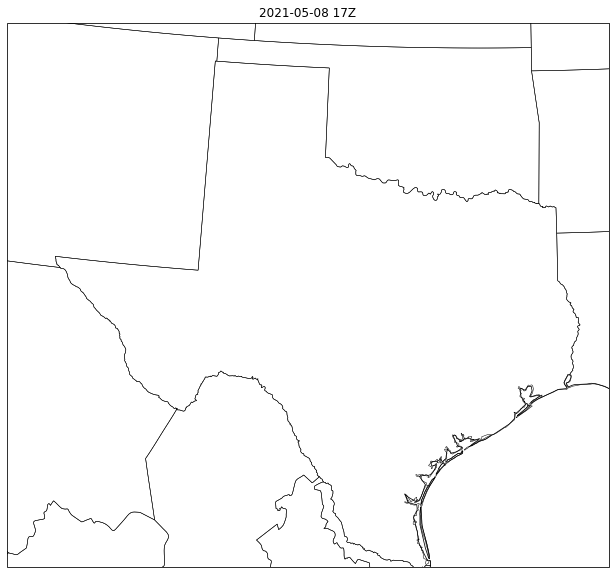

In [89]:
# Establish new figure with size
fig = plt.figure(figsize=(20,10))

# Format figure
ax = fig.add_subplot(1,1,1,projection= ccrs.LambertConformal())
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.5)

# Satellite Cloud and Moisture Image data
# Adjust the regrid_shape to about 1000 so that code can run faster
image_extent = (CMI.metpy.x[0], CMI.metpy.x[-1], CMI.metpy.y[0], CMI.metpy.y[-1])
ax.imshow(CMI, extent=image_extent, origin='lower', cmap='Greys_r',
          regrid_shape=5000, transform=CMI.metpy.cartopy_crs)

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Cloud Moisture Image pt2.png")

## Real Time Data Analysis

In [90]:
# Obtain Real Time Data of Continental United States
rtma_cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/catalog.xml')
rtma_data = rtma_cat.datasets['Full Collection Dataset'].remote_access(use_xarray=True)
rtma_data = rtma_data.metpy.parse_cf()

In [91]:
# Obtain Pressure, Temperature, and Dewpoint Temp of Real Time Data
pres = rtma_data['Pressure_Analysis_surface'].metpy.sel(time=dt,method='nearest').squeeze()
temp = rtma_data['Temperature_Analysis_height_above_ground'].metpy.sel(time=dt,method='nearest').squeeze()
dewp = rtma_data['Dewpoint_temperature_Analysis_height_above_ground'].metpy.sel(time=dt,method='nearest').squeeze()

In [92]:
# Display information about one of the Variables
pres

<xarray.DataArray 'Pressure_Analysis_surface' (y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x          (x) float32 -2.763e+06 -2.761e+06 ... 2.679e+06 2.682e+06
  * y          (y) float32 -2.638e+05 -2.612e+05 ... 3.228e+06 3.231e+06
    metpy_crs  object Projection: lambert_conformal_conic
    time2      datetime64[ns] 2021-05-08T17:00:00
    reftime2   datetime64[ns] 2021-05-08T17:00:00
Attributes:
    long_name:                      Pressure Analysis @ Ground or water surface
    units:                          Pa
    abbreviation:                   PRES
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-3-0_L1
    Grib2_Parameter:                [0 3 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Pressure
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Analysis

In [93]:
# Calculate and smooth out Equivalent Potential Temperature 
theta_e = mpcalc.equivalent_potential_temperature(pres,temp,dewp)
theta_e = mpcalc.smooth_gaussian(theta_e,n=8)

In [94]:
plot_proj = theta_e.metpy.cartopy_crs

Plot Real-Time data

Text(0.5, 1.0, '2021-05-08 17Z')

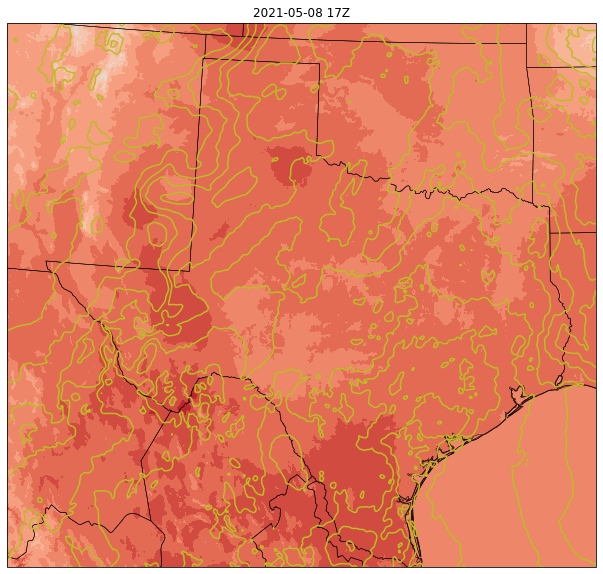

In [95]:
# Establish new figure with size
fig = plt.figure(figsize=(20,10))

# Format Figure
ax = fig.add_subplot(1,1,1,projection=plot_proj)
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.5)

# Temperature Data
ax.contourf(temp.metpy.x, temp.metpy.y, temp - 273.15,
            transform=temp.metpy.cartopy_crs,
            levels=np.arange(-30,40,4),cmap='coolwarm')
# Theta_e
ax.contour(theta_e.metpy.x, theta_e.metpy.y, theta_e,
           levels=np.arange(240,400,4),colors='tab:olive',
           transform=theta_e.metpy.cartopy_crs)

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Realtime Surface Temp pt2.png")

## METAR Analysis

In [96]:
# Meterological Data from TDS catalog
metar_cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

In [97]:
# Metar dataset with specific date time 
metar_file = metar_cat.datasets.filter_time_nearest(dt).remote_open()

In [98]:
# Decode Metar data
metar_text = StringIO(metar_file.read().decode('ascii'))

In [99]:
# Surface data from Metar file add year and month data
sfc_data = parse_metar_file(metar_text, year=dt.year, month=dt.month)

In [100]:
# Establish units to Surface Data
sfc_units = sfc_data.units

In [101]:
# Display Surface data and units
sfc_units

{'station_id': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meters',
 'date_time': None,
 'wind_direction': 'degrees',
 'wind_speed': 'kts',
 'eastward_wind': 'kts',
 'northward_wind': 'kts',
 'current_wx1': None,
 'current_wx2': None,
 'current_wx3': None,
 'low_cloud_type': None,
 'low_cloud_level': 'feet',
 'medium_cloud_type': None,
 'medium_cloud_level': 'feet',
 'high_cloud_type': None,
 'high_cloud_level': 'feet',
 'highest_cloud_type': None,
 'highest_cloud_level:': None,
 'cloud_coverage': None,
 'air_temperature': 'degC',
 'dew_point_temperature': 'degC',
 'altimeter': 'inHg',
 'air_pressure_at_sea_level': 'hPa',
 'present_weather': None,
 'past_weather': None,
 'past_weather2': None}

In [102]:
# Convert Surface data from DF to Unit arrays
sfc_data = pandas_dataframe_to_unit_arrays(sfc_data,sfc_units)

In [103]:
# Collect air temperature data
sfc_data['air_temperature']

Magnitude,[26.0 8.0 10.0 ... 10.0 22.0 25.0]
Units,degree_Celsius


In [104]:
# Collect Wind component and velocity data
sfc_data['u'],sfc_data['v'] = mpcalc.wind_components(sfc_data['wind_speed'],sfc_data['wind_direction'])

In [105]:
locs = plot_proj.transform_points(ccrs.PlateCarree(),sfc_data['longitude'].m, sfc_data['latitude'].m)

In [106]:
# Reduce amount of points of data to clean plots
sfc_data_mask = mpcalc.reduce_point_density(locs[:,:2], 100000)

Plot Metar Data

Text(0.5, 1.0, '2021-05-08 17Z')

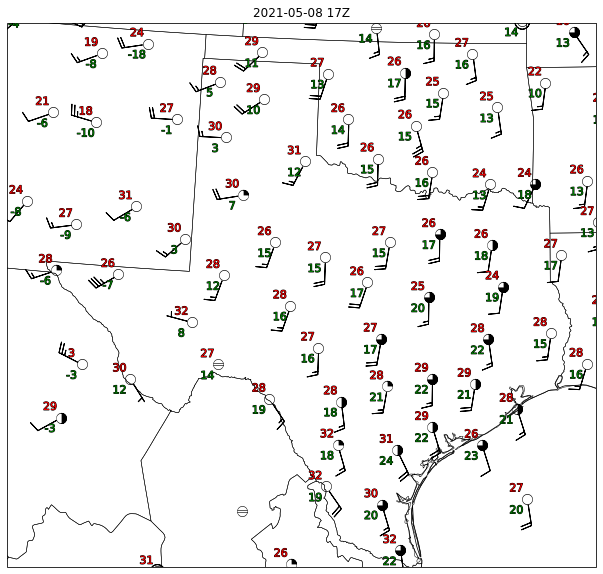

In [107]:
# New figure with size
fig = plt.figure(figsize=(20,10))

# Figure formating
ax = fig.add_subplot(1,1,1,projection=plot_proj)
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.5)

# METAR Data
stn = mpplots.StationPlot(ax, sfc_data['longitude'][sfc_data_mask].m, sfc_data['latitude'][sfc_data_mask].m ,
                          transform=ccrs.PlateCarree(), fontsize=11, zorder=10, clip_on=True)
stn.plot_parameter('NW', sfc_data['air_temperature'][sfc_data_mask], color='red',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_parameter('SW', sfc_data['dew_point_temperature'][sfc_data_mask], color='green',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_symbol('C', sfc_data['cloud_coverage'][sfc_data_mask], mpplots.sky_cover)
stn.plot_barb(sfc_data['u'][sfc_data_mask], sfc_data['v'][sfc_data_mask])

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Metorlogical Plot pt2.png")

## Comprehensive Plot of Satalite, RTMA, and Metar Data

Text(0.5, 1.0, '2021-05-08 17Z')

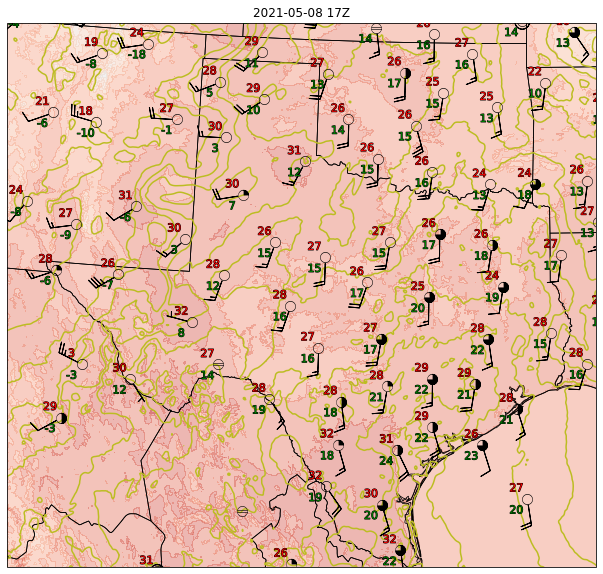

In [108]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1,projection=plot_proj)
ax.set_extent((-107,-93,25.9,37), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'),linewidth=0.75)
ax.add_feature(cfeature.STATES,linewidth=0.75)

# Satellite
# Adjust the regrid_shape to about 100 so that code can run faster
image_extent = (CMI.metpy.x[0], CMI.metpy.x[-1], CMI.metpy.y[0], CMI.metpy.y[-1])
ax.imshow(CMI, extent=image_extent, origin='lower', cmap='Greys_r',
          regrid_shape=5000, transform=CMI.metpy.cartopy_crs)

# Temperature
ax.contourf(temp.metpy.x, temp.metpy.y, temp - 273.15,
            transform=temp.metpy.cartopy_crs,
            levels=np.arange(-30,40,4),cmap='coolwarm' , alpha = 0.4)
# Theta_e
ax.contour(theta_e.metpy.x, theta_e.metpy.y, theta_e,
           levels=np.arange(240,400,4),colors='tab:olive',
           transform=theta_e.metpy.cartopy_crs)

## METARS
stn = mpplots.StationPlot(ax, sfc_data['longitude'][sfc_data_mask].m, sfc_data['latitude'][sfc_data_mask].m ,
                          transform=ccrs.PlateCarree(), fontsize=11, zorder=10, clip_on=True)
stn.plot_parameter('NW', sfc_data['air_temperature'][sfc_data_mask], color='red',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_parameter('SW', sfc_data['dew_point_temperature'][sfc_data_mask], color='green',
                   path_effects=[withStroke(linewidth=1, foreground = 'black')])
stn.plot_symbol('C', sfc_data['cloud_coverage'][sfc_data_mask], mpplots.sky_cover)
stn.plot_barb(sfc_data['u'][sfc_data_mask], sfc_data['v'][sfc_data_mask])

plt.title(dt.strftime('%Y-%m-%d %HZ'))

# Save Figure into workbook
#plt.savefig("Combined Data Plot pt2.png")